In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# files to load
city_data_to_load = os.path.join('Resources', 'city_data.csv')
ride_data_to_load = os.path.join('Resources', 'ride_data.csv')
# Read the files in DataFrames
city_data_df = pd.read_csv(city_data_to_load)
city_data_df, city_data_df.dtypes

(                city  driver_count   type
 0        Richardfort            38  Urban
 1       Williamsstad            59  Urban
 2        Port Angela            67  Urban
 3         Rodneyfort            34  Urban
 4        West Robert            39  Urban
 ..               ...           ...    ...
 115     Bradshawfurt             7  Rural
 116     New Ryantown             2  Rural
 117   Randallchester             9  Rural
 118      Jessicaport             1  Rural
 119  South Saramouth             7  Rural
 
 [120 rows x 3 columns],
 city            object
 driver_count     int64
 type            object
 dtype: object)

In [3]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df, ride_data_df.dtypes

(                    city                 date   fare        ride_id
 0     Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873
 1     South Michelleport  2019-03-04 18:24:09  30.24  2343912425577
 2     Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003
 3             Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178
 4             South Jack  2019-03-06 04:28:35  34.58  3908451377344
 ...                  ...                  ...    ...            ...
 2370         Michaelberg  2019-04-29 17:04:39  13.38  8550365057598
 2371     Lake Latoyabury  2019-01-30 00:05:47  20.76  9018727594352
 2372         North Jaime  2019-02-10 21:03:50  11.11  2781339863778
 2373        West Heather  2019-05-07 19:22:15  44.94  4256853490277
 2374          Newtonview  2019-04-25 10:20:13  55.84  9990581345298
 
 [2375 rows x 4 columns],
 city        object
 date        object
 fare       float64
 ride_id      int64
 dtype: object)

In [4]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [5]:
ride_data_df['city'].nunique(), city_data_df['type'].unique()

(120, array(['Urban', 'Suburban', 'Rural'], dtype=object))

In [6]:
# get the number of data points for the urban cities
sum(city_data_df['type']=='Urban'), sum(city_data_df['type']=='Suburban'), sum(city_data_df['type']=='Rural')

(66, 36, 18)

In [8]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [12]:
average_fare = pyber_data_df.groupby('city').mean()['fare']
total_rides = pyber_data_df.groupby('city').count()['ride_id']
number_of_drivers = pyber_data_df.groupby('city').mean()['driver_count']
average_fare, total_rides, number_of_drivers

(city
 Amandaburgh         24.641667
 Barajasview         25.332273
 Barronchester       36.422500
 Bethanyland         32.956111
 Bradshawfurt        40.064000
                       ...    
 West Robert         25.123871
 West Samuelburgh    21.767600
 Williamsonville     31.875000
 Williamsstad        24.362174
 Williamsview        26.599000
 Name: fare, Length: 120, dtype: float64,
 city
 Amandaburgh         18
 Barajasview         22
 Barronchester       16
 Bethanyland         18
 Bradshawfurt        10
                     ..
 West Robert         31
 West Samuelburgh    25
 Williamsonville     14
 Williamsstad        23
 Williamsview        20
 Name: ride_id, Length: 120, dtype: int64,
 city
 Amandaburgh         12.0
 Barajasview         26.0
 Barronchester       11.0
 Bethanyland         22.0
 Bradshawfurt         7.0
                     ... 
 West Robert         39.0
 West Samuelburgh    73.0
 Williamsonville      2.0
 Williamsstad        59.0
 Williamsview        46.0
 Name:

In [16]:
urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [18]:
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [21]:
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [22]:
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

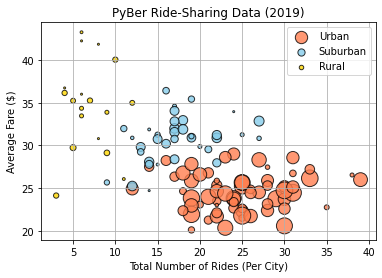

In [45]:
fig, ax = plt.subplots()
ax.scatter(urban_ride_count, 
           urban_avg_fare, 
           s=urban_driver_count*4, 
           facecolors='coral', 
           edgecolors='black', 
           alpha=0.8, label='Urban', 
           linewidth=1)
ax.scatter(suburban_ride_count, 
           suburban_avg_fare, 
           s=suburban_driver_count*4, 
           facecolors='skyblue', 
           edgecolors='black', 
           alpha=0.8, 
           label='Suburban', 
           linewidth=1)
ax.scatter(rural_ride_count, 
           rural_avg_fare, 
           s=rural_driver_count*4, 
           facecolors='gold', 
           edgecolors='black', 
           alpha=0.8, 
           label='Rural', 
           linewidth=1)
ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.grid()
ax.legend()
plt.show()

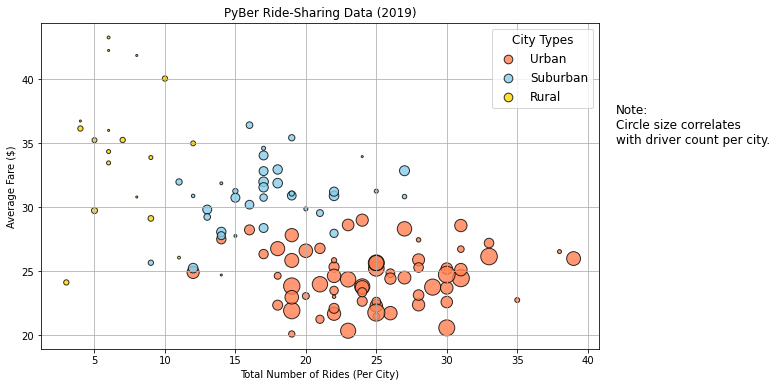

<Figure size 432x288 with 0 Axes>

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(urban_ride_count, 
           urban_avg_fare, 
           s=urban_driver_count*4, 
           facecolors='coral', 
           edgecolors='black', 
           alpha=0.8, label='Urban', 
           linewidth=1)
ax.scatter(suburban_ride_count, 
           suburban_avg_fare, 
           s=suburban_driver_count*4, 
           facecolors='skyblue', 
           edgecolors='black', 
           alpha=0.8, 
           label='Suburban', 
           linewidth=1)
ax.scatter(rural_ride_count, 
           rural_avg_fare, 
           s=rural_driver_count*4, 
           facecolors='gold', 
           edgecolors='black', 
           alpha=0.8, 
           label='Rural', 
           linewidth=1)
ax.set_title('PyBer Ride-Sharing Data (2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
ax.grid()
lgnd = ax.legend(fontsize='12',
                mode='Expanded',
                scatterpoints=1,
                loc='best', # The location setting, loc=, for the legend is where it will fit the "best" based on the plotting of the data points.
                title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
ax.text(42, 35, 'Note:\nCircle size correlates\nwith driver count per city.', fontsize='12')
plt.show()
plt.savefig('analysis/Fig1.png')